In [1]:
import numpy as np
import scipy as sc
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Loi binomiale

La loi binomiale modélise le nombre de succès obtenus lors de la répétition indépendante de plusieurs expériences aléatoires identiques (épreuve de Bernoulli). 

*Variable Bernoulli :* Pour chaque expérience on utilise une variable aléatoire qui prend la valeur 1 lors d'un succès et 0 sinon.

*Variable Binomiale :* C'est la somme de toutes ces variables de Bernoulli, compte le nombre de succès.

**2 paramètres** : **$n$** le nombre d'expériences réalisées, et **$p$** la probabilité de succès.

Probabilité de **$k$** succès :

${\displaystyle \mathbb {P} (X=k)={n \choose k}\,p^{k}(1-p)^{n-k}}$, avec $\scriptstyle {n \choose k}$ le coefficient binomiale

<font color="grey">
- **np.random.rand(d0, d1, ..., dn)**

Créez un tableau de la forme donnée avec un échantillon aléatoire provenant d'une distribution uniforme sur [0, 1].

d0, d1, ..., dn : dimensions du tableau renvoyé. Si aucun argument n'est donné, un flottant unique est renvoyé, entier, facultatif

In [2]:
def Bernoulli(n, p):
    liste_random = np.random.rand(n)
    liste_bernouilli = []
    for x in liste_random :
        if x < p :
            x = 1
        else:
            x = 0
        liste_bernouilli.append(x)
    print ("liste random =", liste_random)
    print ("liste bernouilli =", liste_bernouilli, "\n")
    return liste_bernouilli

def Binomiale(n, p):
    i = 0
    x = 0
    for n in Bernoulli(n, p) :
        if n == 1 :
            x = x + 1
        i = i + 1
    return x

In [3]:
n = 10
p = 0.5
print("nombre d'essais =", n)
print("probabilité de succès =", p)

nombre d'essais = 10
probabilité de succès = 0.5


In [4]:
print("Variable Binomiale =", Binomiale(n, p))

liste random = [ 0.89420982  0.31600104  0.28187909  0.67997921  0.38671984  0.54475652
  0.80222081  0.37694473  0.03342541  0.13026443]
liste bernouilli = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1] 

Variable Binomiale = 6


<font color="grey">
- **np.random.binomial(n, p, size = None)**
    
Renvoie des échantillons (ndarray ou scalaire) où les valeurs sont toutes entières dans [0, n], à partir d'une distribution binomiale. 

n >= 0 : nombre d'essais (flottant, mais tronqué sur un nombre entier)

0 >= p <= 1: probabilité de chaque essai (flottant)

size : Forme de sortie. Si la forme donnée est, par exemple, (m, n, k), alors les échantillons m * n * k sont dessinés. Le défaut est Aucun, auquel cas une valeur unique est retournée.

In [5]:
print("Binomiale =", np.random.binomial(n, p))
print("\nBinomiale_1 =", np.random.binomial(n, p, size=(2, 2, 2)))

Binomiale = 4

Binomiale_1 = [[[7 6]
  [2 4]]

 [[5 2]
  [7 8]]]


<font color="grey">
- np.random.seed(...)

Graine le générateur de l'état random. Il permet d'avoir toujours la même liste random. (bloque random)

In [6]:
np.random.seed(42)
print("Variable Binomiale (42) =", Binomiale(n, p), "\n\n")
np.random.seed(67)
print("Variable Binomiale (67) =", Binomiale(n, p))

liste random = [ 0.37454012  0.95071431  0.73199394  0.59865848  0.15601864  0.15599452
  0.05808361  0.86617615  0.60111501  0.70807258]
liste bernouilli = [1, 0, 0, 0, 1, 1, 1, 0, 0, 0] 

Variable Binomiale (42) = 4 


liste random = [ 0.54585143  0.85885661  0.68589259  0.33159182  0.05999793  0.38627778
  0.21314986  0.93250665  0.7228183   0.04689531]
liste bernouilli = [0, 0, 0, 1, 1, 1, 1, 0, 0, 1] 

Variable Binomiale (67) = 5


In [7]:
np.random.seed(42)
print("Binomiale (42) =", np.random.binomial(n, p))
np.random.seed(67)
print("Binomiale (67) =", np.random.binomial(n, p))

Binomiale (42) = 4
Binomiale (67) = 5


# Fonction de masse (probabilités)

La fonction masse est la fonction qui donne la probabilité d'un résultat élémentaire d'une expérience.

<font color="grey">
- **sc.stats.binom.pmf(k, n, p, loc=0)**
         
Renvoie la Fonction de masse de probabilité à k
    
k = Quantiles (tableau)

loc : Paramètre d'emplacement (par défaut = 0) (tableau, optionnel)

<font color="grey">
- **sc.stats.binom.interval(alpha, n, p, loc=0)**

Intervalle de confiance avec des zones égales autour de la médiane (tableau de flottant). Renvoie les points de fin de gamme qui contiennent (100*alpha)% des valeur possible.
    
Alpha: Probabilité qu'un rv soit tiré de la gamme renvoyée (entre 0 et 1, tableau de flottant)

- **sc.stats.binom.var(n, p, loc=0)**

Renvoie la variance de la distribution (floattant)

- **sc.stats.binom.std(n, p, loc=0)**

Renvoie l'écart type de la distribution (floattant)

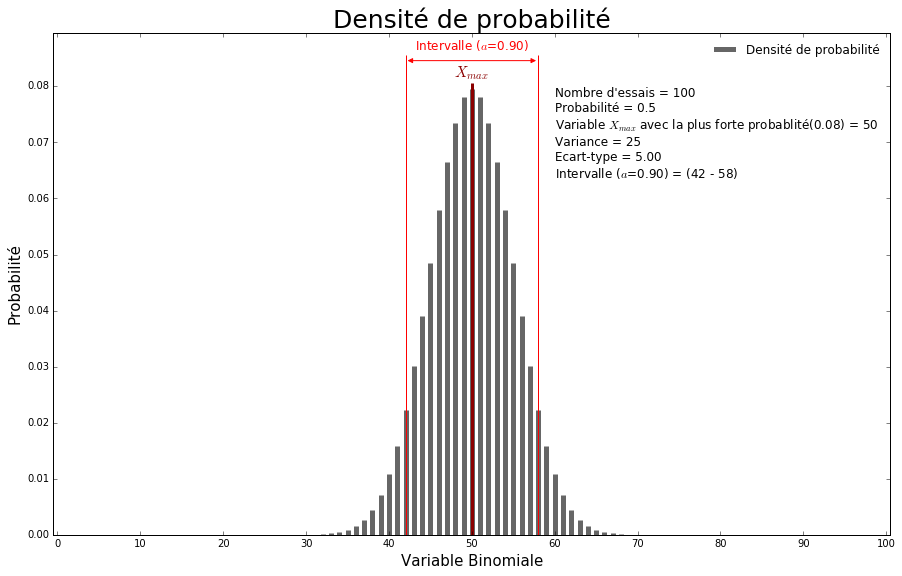

In [8]:
n, p_reel = 100, 0.5
alpha_intervalle = 0.9

fig, ax = plt.subplots(1, 1, figsize=(15, 9))

# Paramètres
x = np.arange(0, n+1)
densite = sc.stats.binom.pmf(x, n, p_reel)

proba_max = max(densite)
variable_max = np.where(densite == proba_max)[0]

intervalle = sc.stats.binom.interval(alpha_intervalle, n, p_reel)
variance = sc.stats.binom.var(n, p_reel)
ecart_type = sc.stats.binom.std(n,p_reel)

# Figure
ax.vlines(x, 0, densite, colors='k', lw=5, alpha=0.6, label="Densité de probabilité")
ax.vlines(intervalle[0], 0, proba_max+0.006, colors='r')
ax.vlines(intervalle[1], 0, proba_max+0.006, colors='r')


ax.annotate("", xy=(intervalle[0], proba_max+0.005), xytext=(intervalle[1], proba_max+0.005), arrowprops=dict(arrowstyle="<|-|>", color='r'))
ax.annotate("Intervalle ($a\alpha$=%1.2f)"%(alpha_intervalle), color='r', fontsize=12, ha='center', xy=(variable_max, proba_max+0.007))

ax.vlines(variable_max, 0, proba_max+0.001, colors='darkred', lw=3)
ax.annotate("$X_{max}$", color='darkred', fontsize=15, fontweight='bold', ha='center', xy=(variable_max, proba_max+0.002))

ax.text(3*n/5, 4*proba_max/5, "Nombre d'essais = %d \nProbabilité = %1.1f\nVariable $X_{max}$ avec la plus forte probablité(%1.2f) = %d\nVariance = %d\nEcart-type = %1.2f\nIntervalle ($a\alpha$=%1.2f) = (%d - %d)"%(n, p_reel, proba_max, variable_max, variance, ecart_type, alpha_intervalle, intervalle[0],intervalle[1]),
            color='k', fontsize=12)

# figure
ax.set_title("Densité de probabilité", fontsize=25)
ax.set_xlim(-0.5, n+0.5)
ax.set_xlabel("Variable Binomiale", fontsize=15)
plt.xticks(np.arange(0, n+1, n/10))
ax.set_ylim(0, proba_max+0.01)
ax.set_ylabel("Probabilité", fontsize=15)
ax.legend(loc='best', frameon=False)
#plt.grid() 
plt.show()

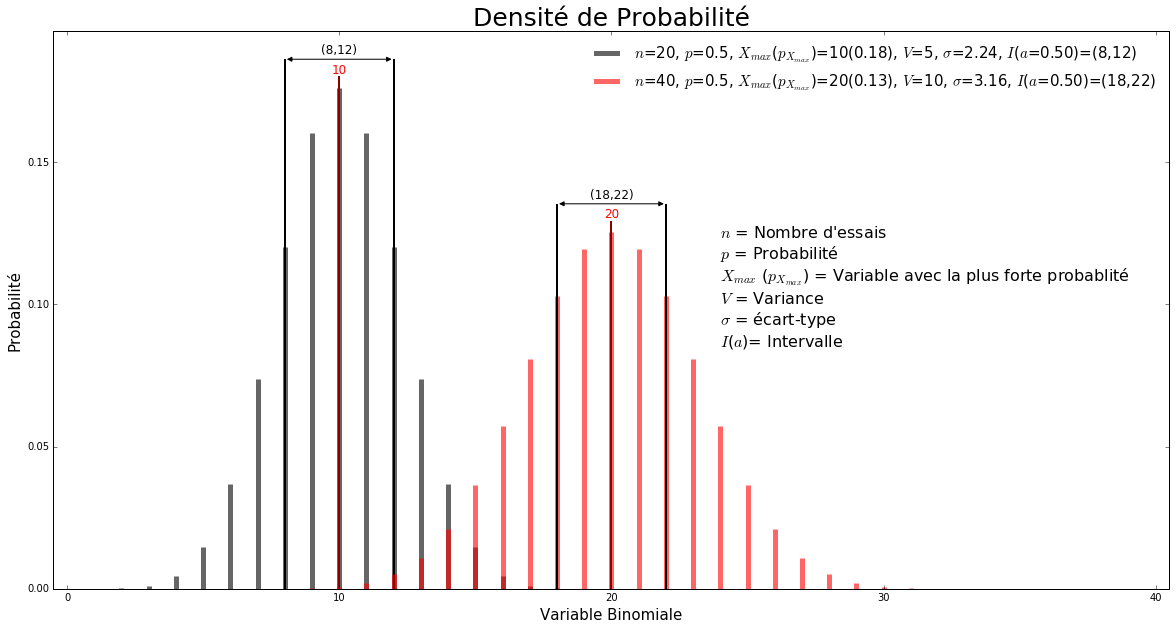

In [9]:
def figure(n , p_reel, alpha_intervalle, couleur) :
    x = np.arange(0, n+1)
    densite = sc.stats.binom.pmf(x, n, p_reel)
    proba_max = max(densite)
    variable_max = np.where(densite == proba_max)[0]
    intervalle = sc.stats.binom.interval(alpha_intervalle, n, p_reel)
    variance = sc.stats.binom.var(n, p_reel)
    ecart_type = sc.stats.binom.std(n,p_reel)
    
    ax.vlines(x, 0, densite, colors=couleur, lw=5, alpha=0.6,
              label= "$n$=%d, $p$=%1.1f, $X_{max}$($p_{X_{max}}$)=%d(%1.2f), $V$=%d, $\sigma$=%1.2f, $I$($a\alpha$=%1.2f)=(%d,%d)"%(n, p_reel, variable_max, proba_max, variance, ecart_type, alpha_intervalle,intervalle[0],intervalle[1]))
    
    ax.vlines(intervalle[0], 0, proba_max+0.01, colors='k', lw=2)
    ax.vlines(intervalle[1], 0, proba_max+0.01, colors='k', lw=2)
    ax.annotate("", xy=(intervalle[0], proba_max+0.01), xytext=(intervalle[1], proba_max+0.01), arrowprops=dict(arrowstyle="<|-|>", color='k'))
    ax.annotate("(%d,%d)"%(intervalle[0], intervalle[1]), color='k', fontsize=12, ha='center', xy=(variable_max, proba_max+0.012))
    
    ax.vlines(variable_max, 0, proba_max+0.004, colors='darkred', lw=2)
    ax.annotate("%d"%(variable_max), color='r', fontsize=12, ha='center', xy=(variable_max, proba_max+0.005))
    
n = np.arange(0, 41, 20)
p = 0.5
alpha = 0.5
couleur = ['k', 'r', 'y', 'g', 'c', 'b', 'm', 'k', 'r', 'y', 'g', 'c', 'b', 'm', 'k', 'r', 'y',  'g']

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

x=0
c=0
for x in n :
    if x > 0 :
        figure(x, p, alpha, couleur[c])
        c=c+1
    x=x+1

ax.text(3*max(n)/5, 3*max(sc.stats.binom.pmf(np.arange(0, n[1]+1), n[1], p))/5,
        "$n$ = Nombre d'essais \n$p$ = Probabilité \n$X_{max}$ ($p_{X_{max}}$) = Variable avec la plus forte probablité \n$V$ = Variance\n$\sigma$ = écart-type \n$I$($a\alpha$)= Intervalle",
           color='k', va='center', fontsize=16)

# figure
ax.set_title("Densité de Probabilité",fontsize=25)
ax.set_xlim(-0.5, max(n)+0.5)
ax.set_xlabel("Variable Binomiale", fontsize=15)
ax.set_ylim(0, max(sc.stats.binom.pmf(np.arange(0, n[1]+1), n[1], p))+0.02)
ax.set_ylabel("Probabilité", fontsize=15)
ax.legend(loc='best',fontsize=15, frameon=False)
plt.show()

In [10]:
np.arange(0, 41, 20)

array([ 0, 20, 40])

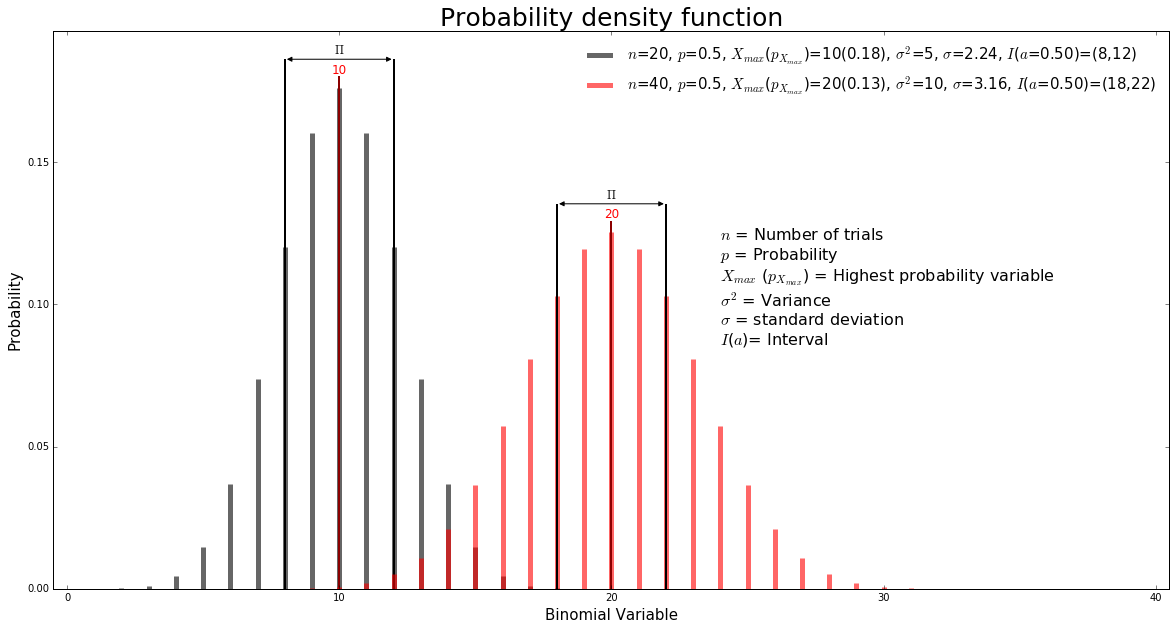

In [11]:
def figure(n , p_reel, alpha_intervalle, couleur) :
    x = np.arange(0, n+1)
    densite = sc.stats.binom.pmf(x, n, p_reel)
    proba_max = max(densite)
    variable_max = np.where(densite == proba_max)[0]
    intervalle = sc.stats.binom.interval(alpha_intervalle, n, p_reel)
    variance = sc.stats.binom.var(n, p_reel)
    ecart_type = sc.stats.binom.std(n,p_reel)
    
    ax.vlines(x, 0, densite, colors=couleur, lw=5, alpha=0.6,
              label= "$n$=%d, $p$=%1.1f, $X_{max}$($p_{X_{max}}$)=%d(%1.2f), $\sigma^2$=%d, $\sigma$=%1.2f, $I$($a\alpha$=%1.2f)=(%d,%d)"%(n, p_reel, variable_max, proba_max, variance, ecart_type, alpha_intervalle,intervalle[0],intervalle[1]))
    
    ax.vlines(intervalle[0], 0, proba_max+0.01, colors='k', lw=2)
    ax.vlines(intervalle[1], 0, proba_max+0.01, colors='k', lw=2)
    ax.annotate("", xy=(intervalle[0], proba_max+0.01), xytext=(intervalle[1], proba_max+0.01), arrowprops=dict(arrowstyle="<|-|>", color='k'))
    ax.annotate('$\Pi$', color='k', fontsize=12, ha='center', xy=(variable_max, proba_max+0.012))
    
    ax.vlines(variable_max, 0, proba_max+0.004, colors='darkred', lw=2)
    ax.annotate("%d"%(variable_max), color='r', fontsize=12, ha='center', xy=(variable_max, proba_max+0.005))
    
n = np.arange(0, 41, 20)
p = 0.5
alpha = 0.5
couleur = ['k', 'r', 'y', 'g', 'c', 'b', 'm', 'k', 'r', 'y', 'g', 'c', 'b', 'm', 'k', 'r', 'y',  'g']

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

x=0
c=0
for x in n :
    if x > 0 :
        figure(x, p, alpha, couleur[c])
        c=c+1
    x=x+1

ax.text(3*max(n)/5, 3*max(sc.stats.binom.pmf(np.arange(0, n[1]+1), n[1], p))/5,
        "$n$ = Number of trials \n$p$ = Probability \n$X_{max}$ ($p_{X_{max}}$) = Highest probability variable \n$\sigma^2$ = Variance\n$\sigma$ = standard deviation \n$I$($a\alpha$)= Interval",
           color='k', va='center', fontsize=16)

# figure
ax.set_title("Probability density function",fontsize=25)
ax.set_xlim(-0.5, max(n)+0.5)
ax.set_xlabel("Binomial Variable", fontsize=15)
ax.set_ylim(0, max(sc.stats.binom.pmf(np.arange(0, n[1]+1), n[1], p))+0.02)
ax.set_ylabel("Probability", fontsize=15)
ax.legend(loc='best',fontsize=15, frameon=False)
plt.show()

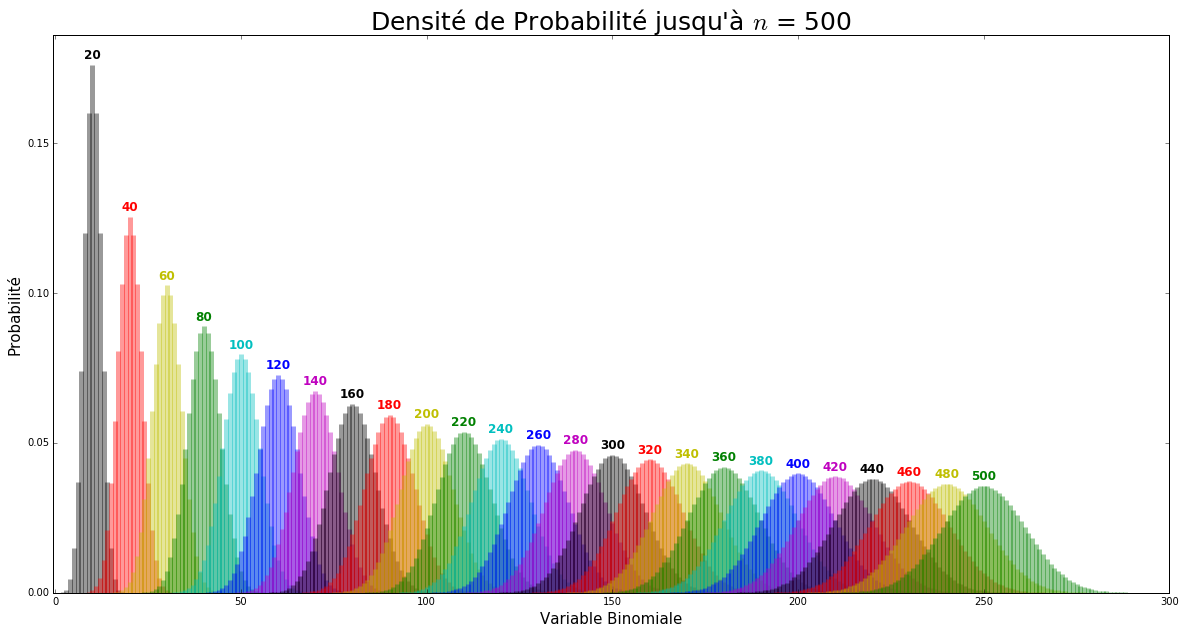

In [12]:
def figure(n , p_reel, couleur) :
    x = np.arange(0, n+1)
    densite = sc.stats.binom.pmf(x, n, p_reel)
    m = max(densite) 
    index_m = np.where(densite == m)[0]
    ax.vlines(x, 0, densite, colors=couleur, lw=5, alpha=0.4)
    ax.annotate("%d"%n, color=couleur, fontsize=12, fontweight='bold', ha='center', xy=(index_m, m+0.002))

n = np.arange(0, 501, 20)
p = 0.5
couleur = ['k', 'r', 'y', 'g', 'c', 'b', 'm', 'k', 'r', 'y', 'g', 'c', 'b', 'm', 'k', 'r', 'y', 'g', 'c', 'b', 'm', 'k', 'r', 'y', 'g']

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
x=0
c=0
for x in n :
    if x > 0 :
        figure(x, p, couleur[c])
        c=c+1
    x=x+1
    
# figure
ax.set_title("Densité de Probabilité jusqu'à $n$ = %d" %max(n),fontsize=25)
ax.set_xlim(-0.5, 3*max(n)/5)
ax.set_xlabel("Variable Binomiale", fontsize=15)
ax.set_ylim(0, max(sc.stats.binom.pmf(np.arange(0, n[1]+1), n[1], p))+0.01)
ax.set_ylabel("Probabilité", fontsize=15)
plt.show()

# Variance et écart type

variance binomial : $V = np(1-p)$

écart type : $\sigma = \sqrt V$

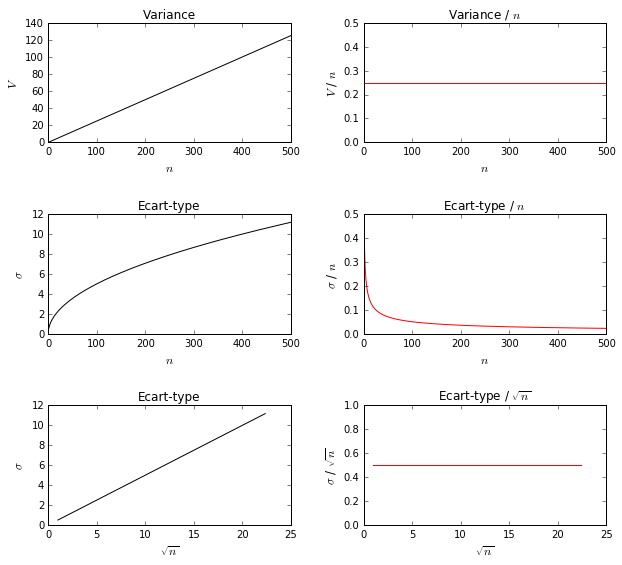

In [13]:
n = np.arange(1, 501, 1)
p = 0.5

# Variance
variance = sc.stats.binom.var(n, p)

# écart-type
ecart_type = sc.stats.binom.std(n,p)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(10, 9))
plt.subplots_adjust(hspace = 0.6, wspace = 0.3)

ax1.plot(n, variance, c='k')
ax1.set_title("Variance",fontsize=12)
ax1.set_xlabel("$n$", fontsize=12)
ax1.set_ylabel("$V$", fontsize=12)

ax2.plot(n, variance/n, c='r')
ax2.set_title("Variance / $n$",fontsize=12)
ax2.set_xlabel("$n$", fontsize=12)
ax2.set_ylabel("$V$ / $n$", fontsize=12)
ax2.set_ylim(0, 0.5)

ax3.plot(n, ecart_type, c='k')
ax3.set_title("Ecart-type",fontsize=12)
ax3.set_xlabel("$n$", fontsize=12)
ax3.set_ylabel("$\sigma$", fontsize=12)

ax4.plot(n, ecart_type/n, c='r')
ax4.set_title("Ecart-type / $n$",fontsize=12)
ax4.set_xlabel("$n$", fontsize=12)
ax4.set_ylabel("$\sigma$ / $n$", fontsize=12)

ax5.plot(np.sqrt(n), ecart_type, c='k')
ax5.set_title("Ecart-type",fontsize=12)
ax5.set_xlabel("$\sqrt{n}$", fontsize=12)
ax5.set_ylabel("$\sigma$", fontsize=12)

ax6.plot(np.sqrt(n), ecart_type/np.sqrt(n), c='r')
ax6.set_title("Ecart-type / $\sqrt{n}$",fontsize=12)
ax6.set_xlabel("$\sqrt{n}$", fontsize=12)
ax6.set_ylabel("$\sigma$ / $\sqrt{n}$", fontsize=12)
ax6.set_ylim(0, 1)

plt.show()

TODO : regarder l'effet de $n$

TODO : plotter la variance en fonction de $n$

# Estimation

** estimateur de la probabilité **

Dans le cas d'une variable discrète finie, on prend comme estimateur de chaque probabilité $p_k$, la fréquence $F_k$ dans l'échantillon

$\widehat{p}_n = F_n = \frac{X_n}{n}$

Pour connaître la probabilité $p$ d'une variable binomiale, on peut aussi établir un intervalle de confiance 

Un intervalle de confiance pour une proportion $p$ à un niveau de confiance 
de 95 % est la réalisation, à partir d’un échantillon, d’un intervalle aléatoire contenant la proportion $p$ avec une probabilité supérieure ou égale à 95 %.

Pour une valeur de $p$ fixée, l’intervalle aléatoire $\begin{bmatrix}F_n - \frac{1}{\sqrt{n}} ; F_n + \frac{1}{\sqrt{n}}\end{bmatrix}$ contient, pour 
$n$ assez grand, la proportion $p$ avec une probabilité au moins égale à 0,95.

TODO: utiliser le ppf ou interval(alpha, n, p, loc=0) dans https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.binom.html

<font color="grey">
- **sc.stats.binom.ppf (q, n, p, loc=0)**

Fonction de point de pourcentage (inverse de cdf) à q. Renvoie le quantile correspondant à la probabilité de la queue inférieure, q.

Q: Probabilité de la queue inférieure (tabeau)


- **sc.stats.binom.cdf(k, n, p, loc=0)**

Fonction de répartition cumulée. Renvoie la fonction de distribution cumulée évaluée à k

K: Quantiles (tableau, entier)

In [14]:
def test(n, p_reel, alpha_intervalle):
    binomiale =  np.random.binomial(n, p_reel)

    ppf = sc.stats.binom.ppf(p_reel, n, p_reel)
    cdf = sc.stats.binom.cdf(ppf, n, p_reel)
    print("ppf_p-reel =", ppf)
    print("cdf_ppf_p-reel =", cdf)

    I = sc.stats.binom.interval(0.5, n, p_reel)
    print("Intervalle =", I,"= (",I[0]/n,",",I[1]/n,")")
    print("\nVariable Binomiale =", binomiale)

    cdf_binomiale = sc.stats.binom.cdf(binomiale, n, p_reel)
    ppf_binomiale = sc.stats.binom.ppf(cdf, n, p_reel)
    print("\nppf_binomiale =", cdf_binomiale)
    print("cdf_ppf-binomiale =", ppf_binomiale)

    # Fréquence du nombre de succès
    F_n = binomiale/n
    print("\nProbabilité estimée (fréquence) =", F_n)
    # intervalle
    I_binomiale = sc.stats.binom.interval(alpha_intervalle, n, F_n)
    print("Intervalle estimé = ", I, "= (",I_binomiale[0]/n,",",I_binomiale[1]/n,")")
    i_binomiale = [F_n-(1./np.sqrt(n)), F_n+(1./np.sqrt(n))]
    print("intervalle estimé calculer =", i_binomiale)

In [15]:
n, p_reel, alpha_intervalle = 100, 0.5, 0.95
test(n, p_reel, alpha_intervalle)

ppf_p-reel = 50.0
cdf_ppf_p-reel = 0.539794618694
Intervalle = (47.0, 53.0) = ( 0.47 , 0.53 )

Variable Binomiale = 40

ppf_binomiale = 0.0284439668205
cdf_ppf-binomiale = 50.0

Probabilité estimée (fréquence) = 0.4
Intervalle estimé =  (47.0, 53.0) = ( 0.31 , 0.5 )
intervalle estimé calculer = [0.30000000000000004, 0.5]


In [16]:
n, p_reel, alpha_intervalle = 100, 0.3, 0.95
test(n, p_reel, alpha_intervalle)

ppf_p-reel = 28.0
cdf_ppf_p-reel = 0.376778179216
Intervalle = (27.0, 33.0) = ( 0.27 , 0.33 )

Variable Binomiale = 28

ppf_binomiale = 0.376778179216
cdf_ppf-binomiale = 28.0

Probabilité estimée (fréquence) = 0.28
Intervalle estimé =  (27.0, 33.0) = ( 0.19 , 0.37 )
intervalle estimé calculer = [0.18000000000000002, 0.38]


In [17]:
n, p_reel, alpha_intervalle = 50, 0.5, 0.95
test(n, p_reel, alpha_intervalle)

ppf_p-reel = 25.0
cdf_ppf_p-reel = 0.55613758633
Intervalle = (23.0, 27.0) = ( 0.46 , 0.54 )

Variable Binomiale = 20

ppf_binomiale = 0.101319375532
cdf_ppf-binomiale = 25.0

Probabilité estimée (fréquence) = 0.4
Intervalle estimé =  (23.0, 27.0) = ( 0.26 , 0.54 )
intervalle estimé calculer = [0.25857864376269052, 0.54142135623730958]
